In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d missaouimohamedamine/fer-mma

 92% 113M/123M [00:03<00:00, 27.8MB/s]
100% 123M/123M [00:03<00:00, 34.4MB/s]


In [46]:
%rm -rf train

In [47]:
%rm -rf test

In [48]:
! unzip /content/fer-mma.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/surprise/2434.jpg  
  inflating: train/surprise/24371.jpg  
  inflating: train/surprise/24398.jpg  
  inflating: train/surprise/24403.jpg  
  inflating: train/surprise/24406.jpg  
  inflating: train/surprise/24408.jpg  
  inflating: train/surprise/24413.jpg  
  inflating: train/surprise/24423.jpg  
  inflating: train/surprise/24438.jpg  
  inflating: train/surprise/24439.jpg  
  inflating: train/surprise/24446.jpg  
  inflating: train/surprise/24449.jpg  
  inflating: train/surprise/2445.jpg  
  inflating: train/surprise/24469.jpg  
  inflating: train/surprise/24478.jpg  
  inflating: train/surprise/24480.jpg  
  inflating: train/surprise/24483.jpg  
  inflating: train/surprise/24486.jpg  
  inflating: train/surprise/24502.jpg  
  inflating: train/surprise/24512.jpg  
  inflating: train/surprise/24523.jpg  
  inflating: train/surprise/24553.jpg  
  inflating: train/surprise/24565.jpg  
  in

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report


In [73]:
# Set the path to your image folder
folder_path = '/content/train/disgust'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the folder
image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Choose the number of augmented images you want
target_count = 20024
augmented_count = 0

# Keep augmenting until you reach the target count
while augmented_count < target_count:
    for img_path in image_files:
        # Load the image and convert it to a numpy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix='aug', save_format='jpg'):
            augmented_count += 1
            if augmented_count >= target_count:
                break  # Break out of the loop when reaching the target count


In [51]:
# Set the path to your image folder
folder_path = '/content/train/sad'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the folder
image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Choose the number of augmented images you want
target_count = 3024
augmented_count = 0

# Keep augmenting until you reach the target count
while augmented_count < target_count:
    for img_path in image_files:
        # Load the image and convert it to a numpy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix='aug', save_format='jpg'):
            augmented_count += 1
            if augmented_count >= target_count:
                break  # Break out of the loop when reaching the target count


In [52]:
# Set the path to your image folder
folder_path = '/content/train/neutral'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the folder
image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Choose the number of augmented images you want
target_count = 1500
augmented_count = 0

# Keep augmenting until you reach the target count
while augmented_count < target_count:
    for img_path in image_files:
        # Load the image and convert it to a numpy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix='aug', save_format='jpg'):
            augmented_count += 1
            if augmented_count >= target_count:
                break  # Break out of the loop when reaching the target count


In [53]:
# Set the path to your image folder
folder_path = '/content/train/angry'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the folder
image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Choose the number of augmented images you want
target_count = 6024
augmented_count = 0

# Keep augmenting until you reach the target count
while augmented_count < target_count:
    for img_path in image_files:
        # Load the image and convert it to a numpy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix='aug', save_format='jpg'):
            augmented_count += 1
            if augmented_count >= target_count:
                break  # Break out of the loop when reaching the target count


In [54]:
# Set the path to your image folder
folder_path = '/content/train/surprise'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the folder
image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Choose the number of augmented images you want
target_count = 13024
augmented_count = 0

# Keep augmenting until you reach the target count
while augmented_count < target_count:
    for img_path in image_files:
        # Load the image and convert it to a numpy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix='aug', save_format='jpg'):
            augmented_count += 1
            if augmented_count >= target_count:
                break  # Break out of the loop when reaching the target count


In [55]:
# Set the path to your image folder
folder_path = '/content/train/fear'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the folder
image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Choose the number of augmented images you want
target_count = 5024
augmented_count = 0

# Keep augmenting until you reach the target count
while augmented_count < target_count:
    for img_path in image_files:
        # Load the image and convert it to a numpy array
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1, save_to_dir=folder_path, save_prefix='aug', save_format='jpg'):
            augmented_count += 1
            if augmented_count >= target_count:
                break  # Break out of the loop when reaching the target count


In [56]:
picture_size = 48
train_path='/content/train'
test_path='/content/test'

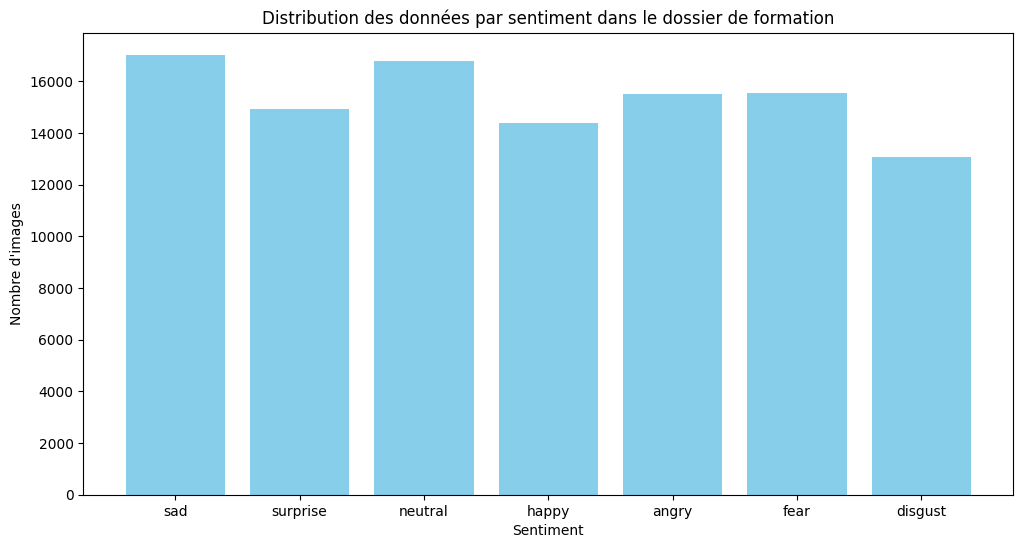

{'sad': 17026, 'surprise': 14910, 'neutral': 16782, 'happy': 14379, 'angry': 15514, 'fear': 15536, 'disgust': 13054}


In [74]:
sentiments = os.listdir(train_path)

sentiment_count = {}

for sentiment in sentiments:
    images = os.listdir(os.path.join(train_path, sentiment))
    sentiment_count[sentiment] = len(images)


# Afficher la distribution sous forme de graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(sentiment_count.keys(), sentiment_count.values(), color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des données par sentiment dans le dossier de formation')
plt.show()
print(sentiment_count)

In [75]:
train_image_count = sum(len(files) for _, _, files in os.walk(train_path))
test_image_count = sum(len(files) for _, _, files in os.walk(test_path))
print(f"Nombre d'images dans l'ensemble d'entraînement : {train_image_count}")
print(f"Nombre d'images dans l'ensemble de test : {test_image_count}")


Nombre d'images dans l'ensemble d'entraînement : 107201
Nombre d'images dans l'ensemble de test : 14832


In [76]:
from keras.preprocessing.image import ImageDataGenerator
import os

picture_size = (48,48)
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    train_path,
    target_size=picture_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    test_path,
    target_size=picture_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 107201 images belonging to 7 classes.
Found 14832 images belonging to 7 classes.


In [77]:
no_of_classes = 7

class_labels = train_set.classes
classes = np.unique(class_labels)
class_weights = compute_class_weight('balanced', classes=classes, y=class_labels)
class_weight_dict = dict(enumerate(class_weights))

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer with L2 regularization
model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

# Fully connected layer 2nd layer with L2 regularization
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

# Fully connected layer 3rd layer with L2 regularization
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

model.add(Dense(no_of_classes, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)      

In [78]:
checkpoint = ModelCheckpoint("./face_emotion_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.001)

# Learning Rate Warm-up
warmup_epochs = 20
initial_lr = 0.001
final_lr = 0.01

def lr_scheduler(epoch, lr):
    if epoch < warmup_epochs:
        lr = initial_lr + epoch * ((final_lr - initial_lr) / warmup_epochs)
    return lr

scheduler = LearningRateScheduler(lr_scheduler)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=batch_size, write_graph=True, write_grads=False, write_images=False)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate, scheduler, tensorboard]

epochs = 200

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=initial_lr),
              metrics=['accuracy'])


In [79]:

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                class_weight=class_weight_dict,
                                callbacks=callbacks_list
                                )


Epoch 1/200
837/837 [==============================] - ETA: 0s - loss: 2.1555 - accuracy: 0.3906

837/837 [==============================] - 71s 79ms/step - loss: 2.1555 - accuracy: 0.3906 - val_loss: 1.6650 - val_accuracy: 0.4187 - lr: 0.0010
Epoch 2/200
837/837 [==============================] - ETA: 0s - loss: 1.3553 - accuracy: 0.5293

837/837 [==============================] - 63s 75ms/step - loss: 1.3553 - accuracy: 0.5293 - val_loss: 1.4626 - val_accuracy: 0.4914 - lr: 0.0014
Epoch 3/200
837/837 [==============================] - ETA: 0s - loss: 1.2784 - accuracy: 0.5669

837/837 [==============================] - 63s 76ms/step - loss: 1.2784 - accuracy: 0.5669 - val_loss: 1.3876 - val_accuracy: 0.5415 - lr: 0.0019
Epoch 4/200
837/837 [==============================] - ETA: 0s - loss: 1.2464 - accuracy: 0.5895

837/837 [==============================] - 62s 74ms/step - loss: 1.2464 - accuracy: 0.5895 - val_loss: 1.4883 - val_accuracy: 0.5198 - lr: 0.0023
Epoch 5/200
837/837 [==============================] - ETA: 0s - loss: 1.2267 - accuracy: 0.6064

837/837 [==============================] - 68s 81ms/step - loss: 1.2267 - accuracy: 0.6064 - val_loss: 1.5048 - val_accuracy: 0.5291 - lr: 0.0028
Epoch 6/200
837/837 [==============================] - ETA: 0s - loss: 1.2052 - accuracy: 0.6216

837/837 [==============================] - 63s 75ms/step - loss: 1.2052 - accuracy: 0.6216 - val_loss: 1.6111 - val_accuracy: 0.4704 - lr: 0.0033
Epoch 7/200
837/837 [==============================] - ETA: 0s - loss: 1.1907 - accuracy: 0.6351

837/837 [==============================] - 64s 77ms/step - loss: 1.1907 - accuracy: 0.6351 - val_loss: 1.2983 - val_accuracy: 0.6116 - lr: 0.0037
Epoch 8/200
837/837 [==============================] - ETA: 0s - loss: 1.1693 - accuracy: 0.6497

837/837 [==============================] - 62s 74ms/step - loss: 1.1693 - accuracy: 0.6497 - val_loss: 1.5703 - val_accuracy: 0.4987 - lr: 0.0041
Epoch 9/200
837/837 [==============================] - ETA: 0s - loss: 1.1467 - accuracy: 0.6617

837/837 [==============================] - 63s 75ms/step - loss: 1.1467 - accuracy: 0.6617 - val_loss: 1.8624 - val_accuracy: 0.4000 - lr: 0.0046
Epoch 10/200
837/837 [==============================] - ETA: 0s - loss: 1.1190 - accuracy: 0.6743

837/837 [==============================] - 63s 75ms/step - loss: 1.1190 - accuracy: 0.6743 - val_loss: 1.5873 - val_accuracy: 0.5218 - lr: 0.0050
Epoch 11/200
837/837 [==============================] - ETA: 0s - loss: 1.1009 - accuracy: 0.6841

837/837 [==============================] - 64s 77ms/step - loss: 1.1009 - accuracy: 0.6841 - val_loss: 1.8427 - val_accuracy: 0.4382 - lr: 0.0055
Epoch 12/200
837/837 [==============================] - ETA: 0s - loss: 1.0778 - accuracy: 0.6953


Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0011900000274181366.
837/837 [==============================] - 63s 75ms/step - loss: 1.0778 - accuracy: 0.6953 - val_loss: 1.5162 - val_accuracy: 0.5325 - lr: 0.0012
Epoch 13/200
837/837 [==============================] - ETA: 0s - loss: 1.0775 - accuracy: 0.7018

837/837 [==============================] - 62s 74ms/step - loss: 1.0775 - accuracy: 0.7018 - val_loss: 1.2697 - val_accuracy: 0.6436 - lr: 0.0064
Epoch 14/200
837/837 [==============================] - ETA: 0s - loss: 1.0672 - accuracy: 0.7097

837/837 [==============================] - 64s 76ms/step - loss: 1.0672 - accuracy: 0.7097 - val_loss: 1.3631 - val_accuracy: 0.6092 - lr: 0.0069
Epoch 15/200
837/837 [==============================] - ETA: 0s - loss: 1.0640 - accuracy: 0.7153

837/837 [==============================] - 64s 77ms/step - loss: 1.0640 - accuracy: 0.7153 - val_loss: 1.5897 - val_accuracy: 0.5018 - lr: 0.0073
Epoch 16/200
837/837 [==============================] - ETA: 0s - loss: 1.0564 - accuracy: 0.7231

837/837 [==============================] - 63s 76ms/step - loss: 1.0564 - accuracy: 0.7231 - val_loss: 1.1472 - val_accuracy: 0.7019 - lr: 0.0077
Epoch 17/200
837/837 [==============================] - ETA: 0s - loss: 1.0589 - accuracy: 0.7247

837/837 [==============================] - 63s 76ms/step - loss: 1.0589 - accuracy: 0.7247 - val_loss: 1.2868 - val_accuracy: 0.6486 - lr: 0.0082
Epoch 18/200
837/837 [==============================] - ETA: 0s - loss: 1.0559 - accuracy: 0.7311

837/837 [==============================] - 63s 76ms/step - loss: 1.0559 - accuracy: 0.7311 - val_loss: 1.5790 - val_accuracy: 0.5617 - lr: 0.0087
Epoch 19/200
837/837 [==============================] - ETA: 0s - loss: 1.0522 - accuracy: 0.7367

837/837 [==============================] - 64s 76ms/step - loss: 1.0522 - accuracy: 0.7367 - val_loss: 1.2994 - val_accuracy: 0.6535 - lr: 0.0091
Epoch 20/200
837/837 [==============================] - ETA: 0s - loss: 1.0574 - accuracy: 0.7383

837/837 [==============================] - 64s 77ms/step - loss: 1.0574 - accuracy: 0.7383 - val_loss: 1.2161 - val_accuracy: 0.6802 - lr: 0.0095
Epoch 21/200
837/837 [==============================] - ETA: 0s - loss: 1.0346 - accuracy: 0.7474


Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0019099999219179154.
837/837 [==============================] - 62s 74ms/step - loss: 1.0346 - accuracy: 0.7474 - val_loss: 1.4605 - val_accuracy: 0.5868 - lr: 0.0019
Epoch 22/200
837/837 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.8066

837/837 [==============================] - 63s 76ms/step - loss: 0.6758 - accuracy: 0.8066 - val_loss: 0.6553 - val_accuracy: 0.8208 - lr: 0.0019
Epoch 23/200
837/837 [==============================] - ETA: 0s - loss: 0.6063 - accuracy: 0.8228

837/837 [==============================] - 68s 82ms/step - loss: 0.6063 - accuracy: 0.8228 - val_loss: 0.6336 - val_accuracy: 0.8343 - lr: 0.0019
Epoch 24/200
837/837 [==============================] - ETA: 0s - loss: 0.5863 - accuracy: 0.8292

837/837 [==============================] - 69s 82ms/step - loss: 0.5863 - accuracy: 0.8292 - val_loss: 0.6326 - val_accuracy: 0.8308 - lr: 0.0019
Epoch 25/200
837/837 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.8397

837/837 [==============================] - 69s 82ms/step - loss: 0.5616 - accuracy: 0.8397 - val_loss: 0.6033 - val_accuracy: 0.8423 - lr: 0.0019
Epoch 26/200
837/837 [==============================] - ETA: 0s - loss: 0.5519 - accuracy: 0.8438

837/837 [==============================] - 64s 76ms/step - loss: 0.5519 - accuracy: 0.8438 - val_loss: 0.5828 - val_accuracy: 0.8491 - lr: 0.0019
Epoch 27/200
837/837 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.8494

837/837 [==============================] - 64s 77ms/step - loss: 0.5363 - accuracy: 0.8494 - val_loss: 0.5644 - val_accuracy: 0.8562 - lr: 0.0019
Epoch 28/200
837/837 [==============================] - ETA: 0s - loss: 0.5251 - accuracy: 0.8534

837/837 [==============================] - 64s 76ms/step - loss: 0.5251 - accuracy: 0.8534 - val_loss: 0.5702 - val_accuracy: 0.8550 - lr: 0.0019
Epoch 29/200
837/837 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.8581

837/837 [==============================] - 63s 75ms/step - loss: 0.5104 - accuracy: 0.8581 - val_loss: 0.5693 - val_accuracy: 0.8615 - lr: 0.0019
Epoch 30/200
837/837 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.8617

837/837 [==============================] - 64s 76ms/step - loss: 0.5034 - accuracy: 0.8617 - val_loss: 0.5459 - val_accuracy: 0.8695 - lr: 0.0019
Epoch 31/200
837/837 [==============================] - ETA: 0s - loss: 0.4906 - accuracy: 0.8667

837/837 [==============================] - 69s 82ms/step - loss: 0.4906 - accuracy: 0.8667 - val_loss: 0.5602 - val_accuracy: 0.8711 - lr: 0.0019
Epoch 32/200
837/837 [==============================] - ETA: 0s - loss: 0.4865 - accuracy: 0.8674

837/837 [==============================] - 64s 76ms/step - loss: 0.4865 - accuracy: 0.8674 - val_loss: 0.5551 - val_accuracy: 0.8675 - lr: 0.0019
Epoch 33/200
837/837 [==============================] - ETA: 0s - loss: 0.4749 - accuracy: 0.8730

837/837 [==============================] - 63s 76ms/step - loss: 0.4749 - accuracy: 0.8730 - val_loss: 0.5234 - val_accuracy: 0.8806 - lr: 0.0019
Epoch 34/200
837/837 [==============================] - ETA: 0s - loss: 0.4653 - accuracy: 0.8769

837/837 [==============================] - 63s 75ms/step - loss: 0.4653 - accuracy: 0.8769 - val_loss: 0.5236 - val_accuracy: 0.8763 - lr: 0.0019
Epoch 35/200
837/837 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.8779

837/837 [==============================] - 63s 75ms/step - loss: 0.4616 - accuracy: 0.8779 - val_loss: 0.5065 - val_accuracy: 0.8855 - lr: 0.0019
Epoch 36/200
837/837 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.8819

837/837 [==============================] - 64s 76ms/step - loss: 0.4509 - accuracy: 0.8819 - val_loss: 0.4881 - val_accuracy: 0.8899 - lr: 0.0019
Epoch 37/200
837/837 [==============================] - ETA: 0s - loss: 0.4502 - accuracy: 0.8831

837/837 [==============================] - 63s 76ms/step - loss: 0.4502 - accuracy: 0.8831 - val_loss: 0.5394 - val_accuracy: 0.8736 - lr: 0.0019
Epoch 38/200
837/837 [==============================] - ETA: 0s - loss: 0.4369 - accuracy: 0.8872

837/837 [==============================] - 63s 75ms/step - loss: 0.4369 - accuracy: 0.8872 - val_loss: 0.5026 - val_accuracy: 0.8935 - lr: 0.0019
Epoch 39/200
837/837 [==============================] - ETA: 0s - loss: 0.4352 - accuracy: 0.8887

837/837 [==============================] - 63s 75ms/step - loss: 0.4352 - accuracy: 0.8887 - val_loss: 0.5094 - val_accuracy: 0.8837 - lr: 0.0019
Epoch 40/200
837/837 [==============================] - ETA: 0s - loss: 0.4232 - accuracy: 0.8932

837/837 [==============================] - 69s 82ms/step - loss: 0.4232 - accuracy: 0.8932 - val_loss: 0.4684 - val_accuracy: 0.8989 - lr: 0.0019
Epoch 41/200
837/837 [==============================] - ETA: 0s - loss: 0.4237 - accuracy: 0.8937

837/837 [==============================] - 69s 82ms/step - loss: 0.4237 - accuracy: 0.8937 - val_loss: 0.4591 - val_accuracy: 0.9033 - lr: 0.0019
Epoch 42/200
837/837 [==============================] - ETA: 0s - loss: 0.4201 - accuracy: 0.8949

837/837 [==============================] - 63s 75ms/step - loss: 0.4201 - accuracy: 0.8949 - val_loss: 0.4693 - val_accuracy: 0.9052 - lr: 0.0019
Epoch 43/200
837/837 [==============================] - ETA: 0s - loss: 0.4071 - accuracy: 0.8994

837/837 [==============================] - 63s 75ms/step - loss: 0.4071 - accuracy: 0.8994 - val_loss: 0.4881 - val_accuracy: 0.8956 - lr: 0.0019
Epoch 44/200
837/837 [==============================] - ETA: 0s - loss: 0.4015 - accuracy: 0.9003

837/837 [==============================] - 64s 76ms/step - loss: 0.4015 - accuracy: 0.9003 - val_loss: 0.4816 - val_accuracy: 0.9053 - lr: 0.0019
Epoch 45/200
837/837 [==============================] - ETA: 0s - loss: 0.4043 - accuracy: 0.9007

837/837 [==============================] - 63s 75ms/step - loss: 0.4043 - accuracy: 0.9007 - val_loss: 0.4452 - val_accuracy: 0.9122 - lr: 0.0019
Epoch 46/200
837/837 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.9039

837/837 [==============================] - 63s 75ms/step - loss: 0.3926 - accuracy: 0.9039 - val_loss: 0.4703 - val_accuracy: 0.9000 - lr: 0.0019
Epoch 47/200
837/837 [==============================] - ETA: 0s - loss: 0.3880 - accuracy: 0.9057

837/837 [==============================] - 62s 74ms/step - loss: 0.3880 - accuracy: 0.9057 - val_loss: 0.4466 - val_accuracy: 0.9128 - lr: 0.0019
Epoch 48/200
837/837 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.9079

837/837 [==============================] - 64s 77ms/step - loss: 0.3824 - accuracy: 0.9079 - val_loss: 0.4478 - val_accuracy: 0.9175 - lr: 0.0019
Epoch 49/200
837/837 [==============================] - ETA: 0s - loss: 0.3779 - accuracy: 0.9098

837/837 [==============================] - 63s 76ms/step - loss: 0.3779 - accuracy: 0.9098 - val_loss: 0.4538 - val_accuracy: 0.9121 - lr: 0.0019
Epoch 50/200
837/837 [==============================] - ETA: 0s - loss: 0.3753 - accuracy: 0.9106


Epoch 50: ReduceLROnPlateau reducing learning rate to 0.00038199997507035736.
837/837 [==============================] - 63s 76ms/step - loss: 0.3753 - accuracy: 0.9106 - val_loss: 0.4936 - val_accuracy: 0.9054 - lr: 3.8200e-04
Epoch 51/200
837/837 [==============================] - ETA: 0s - loss: 0.2989 - accuracy: 0.9268

837/837 [==============================] - 64s 76ms/step - loss: 0.2989 - accuracy: 0.9268 - val_loss: 0.3769 - val_accuracy: 0.9225 - lr: 3.8200e-04
Epoch 52/200
837/837 [==============================] - ETA: 0s - loss: 0.2597 - accuracy: 0.9301

837/837 [==============================] - 64s 76ms/step - loss: 0.2597 - accuracy: 0.9301 - val_loss: 0.3782 - val_accuracy: 0.9243 - lr: 3.8200e-04
Epoch 53/200
837/837 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.9320

837/837 [==============================] - 63s 75ms/step - loss: 0.2488 - accuracy: 0.9320 - val_loss: 0.3756 - val_accuracy: 0.9252 - lr: 3.8200e-04
Epoch 54/200
837/837 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.9321

837/837 [==============================] - 63s 75ms/step - loss: 0.2442 - accuracy: 0.9321 - val_loss: 0.3856 - val_accuracy: 0.9244 - lr: 3.8200e-04
Epoch 55/200
837/837 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9335

837/837 [==============================] - 64s 76ms/step - loss: 0.2388 - accuracy: 0.9335 - val_loss: 0.3754 - val_accuracy: 0.9262 - lr: 3.8200e-04
Epoch 56/200
837/837 [==============================] - ETA: 0s - loss: 0.2373 - accuracy: 0.9341

837/837 [==============================] - 64s 76ms/step - loss: 0.2373 - accuracy: 0.9341 - val_loss: 0.3668 - val_accuracy: 0.9273 - lr: 3.8200e-04
Epoch 57/200
837/837 [==============================] - ETA: 0s - loss: 0.2321 - accuracy: 0.9352

837/837 [==============================] - 63s 75ms/step - loss: 0.2321 - accuracy: 0.9352 - val_loss: 0.3697 - val_accuracy: 0.9287 - lr: 3.8200e-04
Epoch 58/200
837/837 [==============================] - ETA: 0s - loss: 0.2281 - accuracy: 0.9369

837/837 [==============================] - 64s 76ms/step - loss: 0.2281 - accuracy: 0.9369 - val_loss: 0.3816 - val_accuracy: 0.9257 - lr: 3.8200e-04
Epoch 59/200
837/837 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9369

837/837 [==============================] - 63s 76ms/step - loss: 0.2274 - accuracy: 0.9369 - val_loss: 0.3753 - val_accuracy: 0.9279 - lr: 3.8200e-04
Epoch 60/200
837/837 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9372

837/837 [==============================] - 63s 75ms/step - loss: 0.2272 - accuracy: 0.9372 - val_loss: 0.3689 - val_accuracy: 0.9281 - lr: 3.8200e-04
Epoch 61/200
837/837 [==============================] - ETA: 0s - loss: 0.2234 - accuracy: 0.9385


Epoch 61: ReduceLROnPlateau reducing learning rate to 7.639999384991825e-05.
837/837 [==============================] - 63s 76ms/step - loss: 0.2234 - accuracy: 0.9385 - val_loss: 0.3714 - val_accuracy: 0.9291 - lr: 7.6400e-05
Epoch 62/200
837/837 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.9410

837/837 [==============================] - 65s 77ms/step - loss: 0.2158 - accuracy: 0.9410 - val_loss: 0.3580 - val_accuracy: 0.9302 - lr: 7.6400e-05
Epoch 63/200
837/837 [==============================] - ETA: 0s - loss: 0.2079 - accuracy: 0.9426

837/837 [==============================] - 63s 75ms/step - loss: 0.2079 - accuracy: 0.9426 - val_loss: 0.3588 - val_accuracy: 0.9302 - lr: 7.6400e-05
Epoch 64/200
837/837 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9422

837/837 [==============================] - 65s 78ms/step - loss: 0.2025 - accuracy: 0.9422 - val_loss: 0.3526 - val_accuracy: 0.9306 - lr: 7.6400e-05
Epoch 65/200
837/837 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.9437

837/837 [==============================] - 64s 77ms/step - loss: 0.2012 - accuracy: 0.9437 - val_loss: 0.3546 - val_accuracy: 0.9313 - lr: 7.6400e-05
Epoch 66/200
837/837 [==============================] - ETA: 0s - loss: 0.1960 - accuracy: 0.9438

837/837 [==============================] - 65s 78ms/step - loss: 0.1960 - accuracy: 0.9438 - val_loss: 0.3538 - val_accuracy: 0.9297 - lr: 7.6400e-05
Epoch 67/200
837/837 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.9431

837/837 [==============================] - 62s 74ms/step - loss: 0.1974 - accuracy: 0.9431 - val_loss: 0.3538 - val_accuracy: 0.9308 - lr: 7.6400e-05
Epoch 68/200
837/837 [==============================] - ETA: 0s - loss: 0.1904 - accuracy: 0.9451

837/837 [==============================] - 63s 75ms/step - loss: 0.1904 - accuracy: 0.9451 - val_loss: 0.3486 - val_accuracy: 0.9310 - lr: 7.6400e-05
Epoch 69/200
837/837 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.9446

837/837 [==============================] - 63s 76ms/step - loss: 0.1928 - accuracy: 0.9446 - val_loss: 0.3484 - val_accuracy: 0.9314 - lr: 7.6400e-05
Epoch 70/200
837/837 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9454

837/837 [==============================] - 64s 76ms/step - loss: 0.1868 - accuracy: 0.9454 - val_loss: 0.3514 - val_accuracy: 0.9314 - lr: 7.6400e-05
Epoch 71/200
837/837 [==============================] - ETA: 0s - loss: 0.1872 - accuracy: 0.9448

837/837 [==============================] - 63s 75ms/step - loss: 0.1872 - accuracy: 0.9448 - val_loss: 0.3454 - val_accuracy: 0.9319 - lr: 7.6400e-05
Epoch 72/200
837/837 [==============================] - ETA: 0s - loss: 0.1874 - accuracy: 0.9454

837/837 [==============================] - 62s 74ms/step - loss: 0.1874 - accuracy: 0.9454 - val_loss: 0.3398 - val_accuracy: 0.9320 - lr: 7.6400e-05
Epoch 73/200
837/837 [==============================] - ETA: 0s - loss: 0.1879 - accuracy: 0.9451

837/837 [==============================] - 63s 76ms/step - loss: 0.1879 - accuracy: 0.9451 - val_loss: 0.3437 - val_accuracy: 0.9310 - lr: 7.6400e-05
Epoch 74/200
837/837 [==============================] - ETA: 0s - loss: 0.1833 - accuracy: 0.9463

837/837 [==============================] - 64s 77ms/step - loss: 0.1833 - accuracy: 0.9463 - val_loss: 0.3519 - val_accuracy: 0.9321 - lr: 7.6400e-05
Epoch 75/200
837/837 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9457

837/837 [==============================] - 64s 76ms/step - loss: 0.1837 - accuracy: 0.9457 - val_loss: 0.3473 - val_accuracy: 0.9325 - lr: 7.6400e-05
Epoch 76/200
837/837 [==============================] - ETA: 0s - loss: 0.1842 - accuracy: 0.9458

837/837 [==============================] - 63s 76ms/step - loss: 0.1842 - accuracy: 0.9458 - val_loss: 0.3496 - val_accuracy: 0.9319 - lr: 7.6400e-05
Epoch 77/200
837/837 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9445

837/837 [==============================] - 64s 76ms/step - loss: 0.1845 - accuracy: 0.9445 - val_loss: 0.3385 - val_accuracy: 0.9313 - lr: 7.6400e-05
Epoch 78/200
837/837 [==============================] - ETA: 0s - loss: 0.1814 - accuracy: 0.9454

837/837 [==============================] - 64s 76ms/step - loss: 0.1814 - accuracy: 0.9454 - val_loss: 0.3518 - val_accuracy: 0.9312 - lr: 7.6400e-05
Epoch 79/200
837/837 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9457

837/837 [==============================] - 63s 76ms/step - loss: 0.1810 - accuracy: 0.9457 - val_loss: 0.3480 - val_accuracy: 0.9325 - lr: 7.6400e-05
Epoch 80/200
837/837 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9464

837/837 [==============================] - 64s 76ms/step - loss: 0.1810 - accuracy: 0.9464 - val_loss: 0.3455 - val_accuracy: 0.9329 - lr: 7.6400e-05
Epoch 81/200
837/837 [==============================] - ETA: 0s - loss: 0.1795 - accuracy: 0.9466

837/837 [==============================] - 63s 75ms/step - loss: 0.1795 - accuracy: 0.9466 - val_loss: 0.3459 - val_accuracy: 0.9325 - lr: 7.6400e-05
Epoch 82/200
837/837 [==============================] - ETA: 0s - loss: 0.1783 - accuracy: 0.9464


Epoch 82: ReduceLROnPlateau reducing learning rate to 1.5279998478945345e-05.
837/837 [==============================] - 64s 76ms/step - loss: 0.1783 - accuracy: 0.9464 - val_loss: 0.3497 - val_accuracy: 0.9327 - lr: 1.5280e-05
Epoch 83/200
837/837 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9473

837/837 [==============================] - 64s 76ms/step - loss: 0.1735 - accuracy: 0.9473 - val_loss: 0.3485 - val_accuracy: 0.9327 - lr: 1.5280e-05
Epoch 84/200
837/837 [==============================] - ETA: 0s - loss: 0.1730 - accuracy: 0.9475

837/837 [==============================] - 64s 76ms/step - loss: 0.1730 - accuracy: 0.9475 - val_loss: 0.3459 - val_accuracy: 0.9326 - lr: 1.5280e-05
Epoch 85/200
837/837 [==============================] - ETA: 0s - loss: 0.1750 - accuracy: 0.9475

837/837 [==============================] - 69s 82ms/step - loss: 0.1750 - accuracy: 0.9475 - val_loss: 0.3460 - val_accuracy: 0.9327 - lr: 1.5280e-05
Epoch 86/200
837/837 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.9484

837/837 [==============================] - 63s 75ms/step - loss: 0.1719 - accuracy: 0.9484 - val_loss: 0.3487 - val_accuracy: 0.9332 - lr: 1.5280e-05
Epoch 87/200
837/837 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9481Restoring model weights from the end of the best epoch: 77.



Epoch 87: ReduceLROnPlateau reducing learning rate to 3.055999695789069e-06.
837/837 [==============================] - 63s 75ms/step - loss: 0.1735 - accuracy: 0.9481 - val_loss: 0.3458 - val_accuracy: 0.9328 - lr: 3.0560e-06
Epoch 87: early stopping


In [80]:
# Generate predictions for the test set
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_labels = test_set.classes

# Get class names
class_names = list(test_set.class_indices.keys())

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))


116/116 [==============================] - 6s 51ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.93      0.89      0.91      1918
     disgust       0.99      1.00      1.00       810
        fear       0.91      0.89      0.90      2042
       happy       0.96      0.97      0.97      3599
     neutral       0.89      0.94      0.91      2449
         sad       0.91      0.89      0.90      2386
    surprise       0.96      0.96      0.96      1628

    accuracy                           0.93     14832
   macro avg       0.94      0.93      0.94     14832
weighted avg       0.93      0.93      0.93     14832



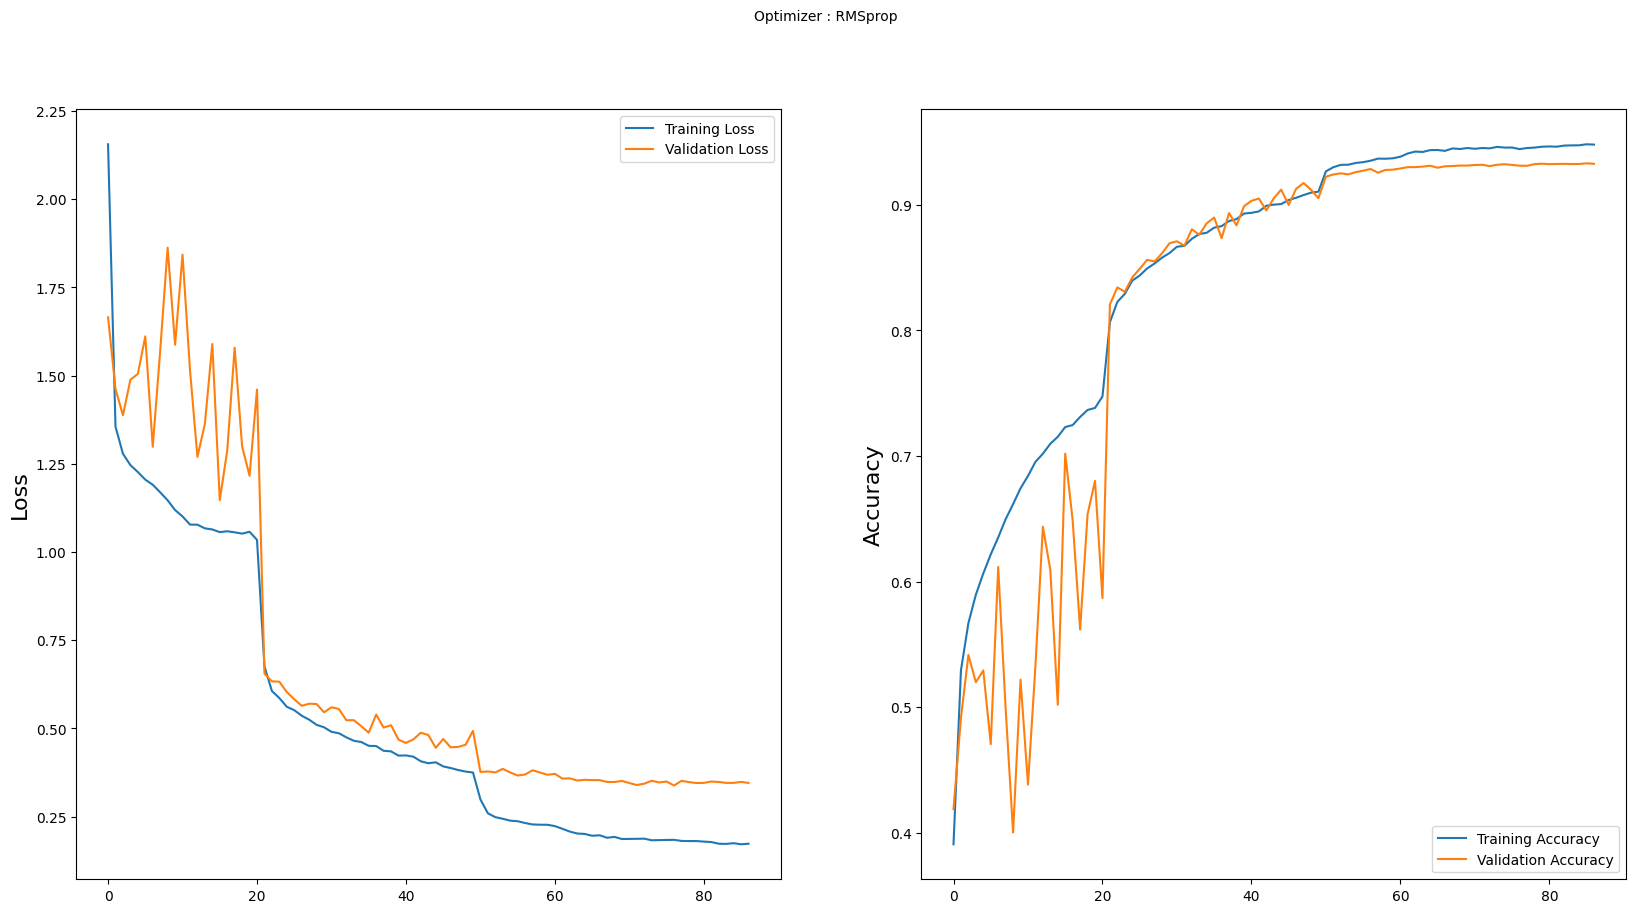

In [81]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


116/116 [==============================] - 4s 35ms/step


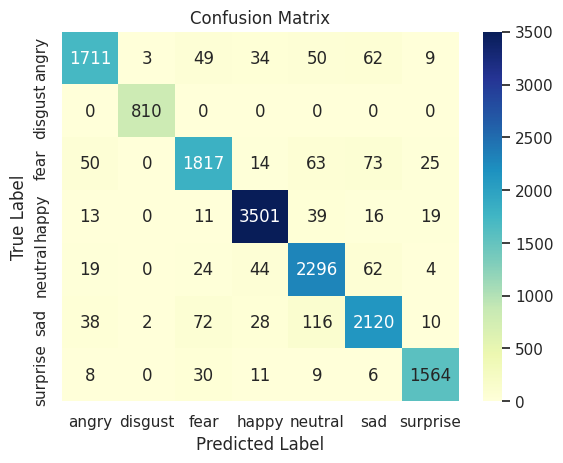

In [82]:
# Get the true labels and predicted labels for the validation set
validation_labels = test_set.classes
validation_pred_probs = model.predict(test_set)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_set.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




In [83]:
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.n // test_set.batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


115/115 [==============================] - 4s 38ms/step - loss: 0.3385 - accuracy: 0.9313
Test Loss: 0.3385
Test Accuracy: 0.9313


In [84]:
pip install opencv-python

In [85]:
model.save('emotion_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:

from keras.models import load_model
emotion_model = load_model('emotion_model.h5')

In [87]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [122]:
take_photo()


<IPython.core.display.Javascript object>

'photo.jpg'

In [90]:


def extract_faces(image_path):
    # Load the pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Extract and save faces
    for i, (x, y, w, h) in enumerate(faces):
        face = image[y:y+h, x:x+w]

    return face


1/1 [==============================] - 0s 18ms/step


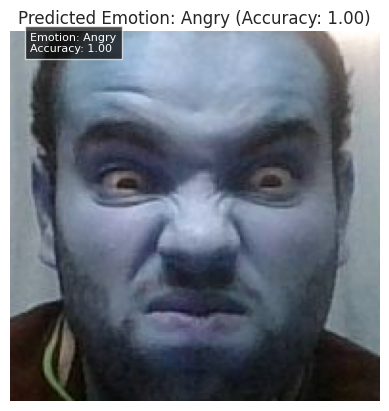

In [123]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def extract_faces(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    extracted_faces = []
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        extracted_faces.append(face)

    return extracted_faces


# Specify the input image path
image_path = "/content/photo.jpg"
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
# Extract faces from the photo
faces = extract_faces(image_path)

# Display or further process the extracted faces
for i, face in enumerate(faces):
    # Resize the face to the required input size for the emotion model
    face_resized = cv2.resize(face, (48, 48))

    # Convert the resized face to grayscale
    face_resized_gray = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)

    # Reshape the image for prediction
    img = np.expand_dims(face_resized_gray, axis=0)
    img = np.expand_dims(img, axis=-1)

    # Make predictions on the extracted face
    predictions = emotion_model.predict(img)
    predicted_class = np.argmax(predictions)
    predicted_emotion = emotion_dict[predicted_class]
    accuracy = predictions[0][predicted_class]

    # Display the original face and predicted emotion
    plt.imshow(face)
    plt.title(f"Predicted Emotion: {predicted_emotion} (Accuracy: {accuracy:.2f})")
    plt.axis('off')

    # Add predicted emotion and accuracy as text on the image
    plt.text(10, 10, f"Emotion: {predicted_emotion}\nAccuracy: {accuracy:.2f}", color='white', fontsize=8, bbox=dict(facecolor='black', alpha=0.7))

    plt.show()
